incremental 
https://stats.stackexchange.com/questions/153938/incremental-gaussian-process-regression

https://datascience.stackexchange.com/questions/13523/can-gaussian-process-be-fit-incrementally

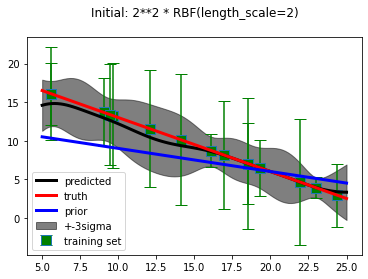

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

A=np.linspace(5,25,num=100)
# prior mean function
prior_beta=12-0.3*A
# true function
true_beta=20-0.7*A

rng = np.random.seed(44)
# Training data
size=15
ind=np.random.randint(0,100,size=size)

# generate the posterior variance (noisy samples)
var_=np.random.uniform(0.1,10.0,size=size)
A_=A[ind][:, np.newaxis]

beta_=true_beta[ind]-prior_beta[ind]
beta_1=true_beta[ind]

plt.figure()

kernel = ConstantKernel(4) * RBF(length_scale=2, length_scale_bounds=(1e-3, 1e2))

# fit
gpr = GaussianProcessRegressor(kernel=kernel,
                              alpha=var_,
                              optimizer=None)

gp = gpr.fit(A_, beta_)

X_ = np.linspace(5, 25, 100)
y_mean, y_cov = gp.predict(X_[:, np.newaxis], return_cov=True)
# Now you add the prior mean function back
y_mean=y_mean+12-0.3*X_

plt.plot(X_, y_mean, 'k', lw=3, zorder=9, label='predicted')
plt.fill_between(X_, y_mean - 3*np.sqrt(np.diag(y_cov)),
                 y_mean + 3*np.sqrt(np.diag(y_cov)),
                 alpha=0.5, color='k', label='+-3sigma')
plt.plot(A, true_beta, 'r', lw=3, zorder=9,label='truth')
plt.plot(A, prior_beta, 'blue', lw=3, zorder=9,label='prior')
plt.errorbar(A_[:,0], beta_1, yerr=3*np.sqrt(var_), fmt='x',ecolor='g',marker='s', 
mfc='g', ms=10,capsize=6,label='training set')

plt.title("Initial: %s\n"% (kernel))
plt.legend()
plt.show()